In [1]:
from tools import *

In [2]:
%matplotlib inline

In [3]:
# https://www.pyimagesearch.com/2015/08/10/checking-your-opencv-version-using-python/
print('cv2: ', cv2.__version__)
print('imutils: ', imutils.__version__)
print("Are you using OpenCV 3.X? {}".format(imutils.is_cv3()))

cv2:  3.3.1
imutils:  0.4.5
Are you using OpenCV 3.X? True


### Street Sketch

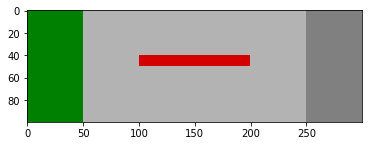

In [4]:
image = cv2.imread("drawing01.png")
plot_image(image)

In [5]:
image.shape

(100, 300, 3)

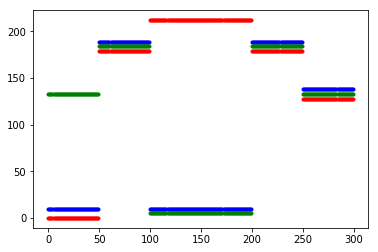

In [6]:
y = 44
plt.plot(image[y,:,0]+10, '.b')
plt.plot(image[y,:,1]+5, '.g')
plt.plot(image[y,:,2], '.r')

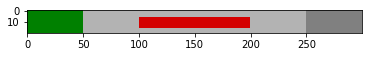

In [7]:
plot_image(image[slice(y-10,y+10),:])

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(_, thresh) = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY_INV)
(_, cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

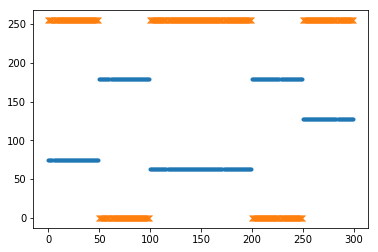

In [9]:
plt.plot(gray[y,:], '.')
plt.plot(thresh[y,:], 'x')

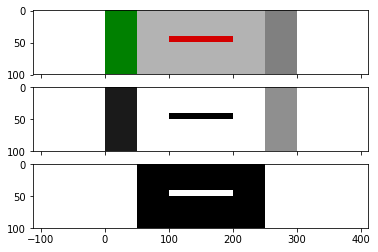

In [10]:
plot_images([image, gray, thresh])

In [11]:
df = df_contours(cnts)
df

,cx,cy,left,right,bottom,top,w,h
0,149,44,100,200,50,40,100,10
1,274,49,250,300,100,0,50,100
2,24,49,0,50,100,0,50,100


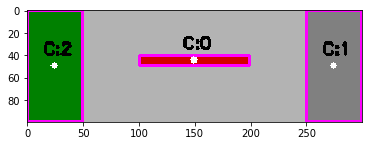

In [12]:
# https://docs.opencv.org/3.3.1/d6/d6e/group__imgproc__draw.html
thickness = 2
# Negative thickness means that a filled circle is to be drawn.
circle_thickness, radius = -1, 3
# Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
contourIdx = -1
# Text properties
fontScale, offset, font = 0.5, -10, cv2.FONT_HERSHEY_SIMPLEX

# loop over the contours
for i, c in enumerate(cnts):
    # draw the contour and center of the shape on the image
    cv2.drawContours(image, cnts, i, color('magenta'), thickness)
    cv2.circle(image, center(df, i), radius, color('white'), circle_thickness)
    cv2.putText(image, 'C:{}'.format(i), center(df, i, offset=offset), 
                font, fontScale, color('black'), thickness)

plot_image(image)

### Street Picture
- [cv2.Canny](https://docs.opencv.org/3.3.1/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)

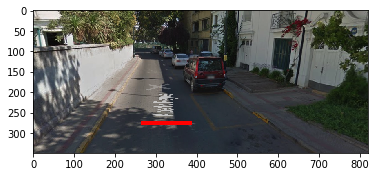

In [13]:
image = cv2.imread("calle02.png")
plot_image(image)

In [14]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
thresh = cv2.Canny(gray, 30, 200)
#(_, thresh) = cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY_INV)
(_, cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

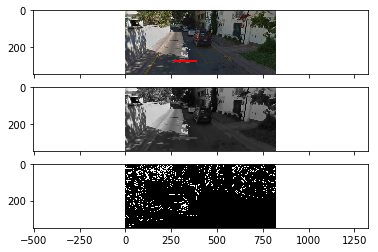

In [15]:
plot_images([image, gray, thresh])

In [16]:
df = df_contours(cnts)
#df

In [17]:
# https://docs.opencv.org/3.3.1/d6/d6e/group__imgproc__draw.html
thickness = 2
# Negative thickness means that a filled circle is to be drawn.
circle_thickness, radius = -1, 3
# Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
contourIdx = -1
# Text properties
fontScale, offset, font = 0.5, -10, cv2.FONT_HERSHEY_SIMPLEX

# loop over the contours
#for i, c in enumerate(cnts):
#    # draw the contour and center of the shape on the image
#    cv2.drawContours(image, cnts, i, color('magenta'), thickness)
#    cv2.circle(image, center(df, i), radius, color('white'), circle_thickness)
#    cv2.putText(image, 'C:{}'.format(i), center(df, i, offset=offset), 
#                font, fontScale, color('black'), thickness)

#plt.imshow(image)

In [18]:
df = df_image(image)
df

,cx,cy,left,right,bottom,top,w,h
0,410.5,174.5,0.0,821.0,349.0,0.0,821.0,349.0


In [19]:
df = df_image(image, df)
df

,cx,cy,left,right,bottom,top,w,h
0,410.5,174.5,0.0,821.0,349.0,0.0,821.0,349.0
1,410.5,174.5,0.0,821.0,349.0,0.0,821.0,349.0
